In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error,r2_score, accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler



In [6]:
df = pd.read_csv("circuits.csv", encoding="latin1")

df.head(20)

,circuit_id,name,lat,long,locality,country,Wikipedia_url
0,silverstone,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK,https://en.wikipedia.org/wiki/Silverstone_Circuit
1,monaco,Circuit de Monaco,43.7347,7.42056,Monte-Carlo,Monaco,https://en.wikipedia.org/wiki/Circuit_de_Monaco
2,indianapolis,Indianapolis Motor Speedway,39.7950,-86.23470,Indianapolis,USA,https://en.wikipedia.org/wiki/Indianapolis_Mot...
3,bremgarten,Circuit Bremgarten,46.9589,7.40194,Bern,Switzerland,https://en.wikipedia.org/wiki/Circuit_Bremgarten
4,spa,Circuit de Spa-Francorchamps,50.4372,5.97139,Spa,Belgium,https://en.wikipedia.org/wiki/Circuit_de_Spa-F...
5,reims,Reims-Gueux,49.2542,3.93083,Reims,France,https://en.wikipedia.org/wiki/Reims-Gueux
6,monza,Autodromo Nazionale di Monza,45.6156,9.28111,Monza,Italy,https://en.wikipedia.org/wiki/Autodromo_Nazion...
7,nurburgring,Nurburgring,50.3356,6.94750,Nurburg,Germany,https://en.wikipedia.org/wiki/N%C3%BCrburgring
8,pedralbes,Circuit de Pedralbes,41.3903,2.11667,Barcelona,Spain,https://en.wikipedia.org/wiki/Pedralbes_Circuit
9,essarts,Rouen-Les-Essarts,49.3306,1.00458,Rouen,France,https://en.wikipedia.org/wiki/Rouen-Les-Essarts


In [16]:
df.head(20).drop('Wikipedia_url ', axis=1)

,circuit_id,name,lat,long,locality,country
0,silverstone,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK
1,monaco,Circuit de Monaco,43.7347,7.42056,Monte-Carlo,Monaco
2,indianapolis,Indianapolis Motor Speedway,39.7950,-86.23470,Indianapolis,USA
3,bremgarten,Circuit Bremgarten,46.9589,7.40194,Bern,Switzerland
4,spa,Circuit de Spa-Francorchamps,50.4372,5.97139,Spa,Belgium
5,reims,Reims-Gueux,49.2542,3.93083,Reims,France
6,monza,Autodromo Nazionale di Monza,45.6156,9.28111,Monza,Italy
7,nurburgring,Nurburgring,50.3356,6.94750,Nurburg,Germany
8,pedralbes,Circuit de Pedralbes,41.3903,2.11667,Barcelona,Spain
9,essarts,Rouen-Les-Essarts,49.3306,1.00458,Rouen,France


In [15]:
df.columns

Index(['circuit_id', 'name', 'lat', 'long', 'locality', 'country',
       'Wikipedia_url '],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Select actual columns from your DataFrame
X = df[['circuit_id', 'country']].copy()

# 2. Encode categorical column "country"
le = LabelEncoder()
X['country'] = le.fit_transform(X['country'])

# 3. Scale numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 5. Plot clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', s=200, marker='X', label='Centroids')
plt.xlabel('circuit_id (scaled)')
plt.ylabel('country (scaled)')
plt.legend()
plt.show()


ValueError: could not convert string to float: 'silverstone'

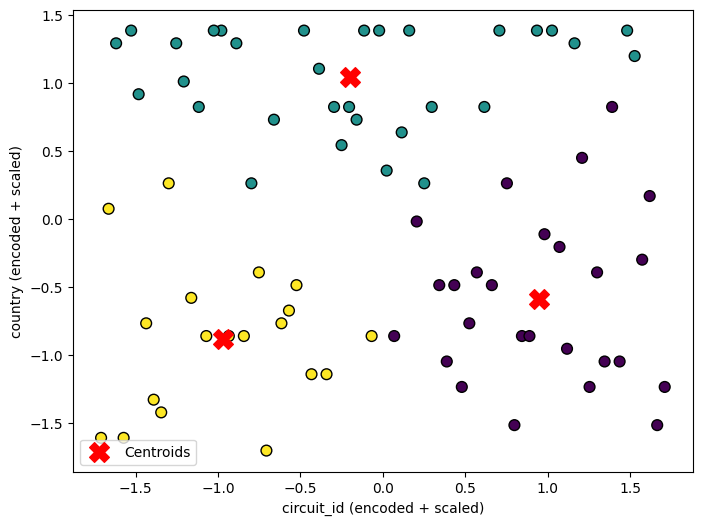

In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['circuit_id', 'country']].copy()


le1 = LabelEncoder()
X['circuit_id'] = le1.fit_transform(X['circuit_id'])

le2 = LabelEncoder()
X['country'] = le2.fit_transform(X['country'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolors='k', s=60)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel("circuit_id (encoded + scaled)")
plt.ylabel("country (encoded + scaled)")
plt.legend()
plt.show()
